<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/cnn/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime

In [141]:
import tensorflow as tf
from os import path, getcwd, chdir
path = f"{getcwd()}/mnist.npz"
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
import numpy as np

time: 2.32 ms


#Load dataset

In [156]:
# def train_mnist_conv():  
class Mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
      if logs.get('accuracy')>=0.998:
          self.model.stop_training = True

callbacks = Mycallback() 

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.


time: 365 ms


In [157]:
cat_training_labels = tf.keras.utils.to_categorical(
    training_labels, num_classes=10, dtype='float32'
)
cat_test_labels = tf.keras.utils.to_categorical(
    test_labels, num_classes=10, dtype='float32'
)

time: 3.76 ms


#CNN model

In [158]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(3,3),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


time: 79.7 ms


In [159]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 6, 6, 16)          4624      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 144)               0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 144)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 256)             

#Non Cross validation

In [160]:
history = model.fit(
    training_images,training_labels,validation_split = 0.2,epochs=40 ,callbacks =[callbacks]
)
print(model.evaluate(test_images, test_labels))
# return history.epoch, history.history['accuracy'][-1]
%load_ext autotime

Epoch 1/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4301 - accuracy: 0.8587 - val_loss: 0.0930 - val_accuracy: 0.9722
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1640 - accuracy: 0.9494 - val_loss: 0.0696 - val_accuracy: 0.9784
Epoch 3/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1306 - accuracy: 0.9596 - val_loss: 0.0538 - val_accuracy: 0.9848
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1123 - accuracy: 0.9650 - val_loss: 0.0504 - val_accuracy: 0.9853
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1007 - accuracy: 0.9692 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0936 - accuracy: 0.9708 - val_loss: 0.0440 - val_accuracy: 0.9866
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0859 - accuracy: 0.9735 - val_loss: 0.0433 - val_accuracy:

In [161]:
test_history = model.evaluate(x=test_images,y=test_labels )
%load_ext autotime

313/313 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9917
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 740 ms


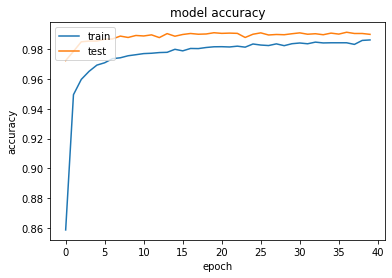

time: 152 ms


In [162]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Cross validation

In [163]:
X = np.append(training_images,test_images,axis=0)
Y = np.append(training_labels,test_labels)

time: 92.4 ms


In [166]:
seed = 7
np.random.seed(seed)
kfold = sk.StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)

cvscores = []
step = 0
acc = 0
for train, test in kfold.split(X, Y):	
  model.fit(X[train], Y[train],validation_split = 0.2,epochs=40 ,callbacks =[callbacks])
  scores = model.evaluate(X[test], Y[test], verbose=0)
  print("step {0} ----- {1} is {2}".format(step,model.metrics_names[1], scores[1]*100))
  step += 1
  cvscores.append(scores[1] * 100)
print("The average of the model accuracy is {0} (+/- {1})".format(np.mean(cvscores), np.std(cvscores)))

Epoch 1/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0269 - val_accuracy: 0.9921
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0278 - val_accuracy: 0.9919
Epoch 3/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0521 - accuracy: 0.9831 - val_loss: 0.0254 - val_accuracy: 0.9921
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0266 - val_accuracy: 0.9924
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0518 - accuracy: 0.9848 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0263 - val_accuracy: